# Load Forecasting

blablabla

We're using Building 7 as a reference for this (large commercial, >50,000 ppl)

**Sources:**
https://openei.org/datasets/dataset/consumption-outdoor-air-temperature-11-commercial-buildings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline

df = pd.read_csv('./data/building60preoffice.csv')
df.head()
df.shape

(8735, 3)

In [2]:
# Set Date as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(pd.DatetimeIndex(df['Date']))

df['hour'] = df['Date'].dt.hour

df.head()

,Date,OAT,Building 6 kW,hour
Date,,,,
2009-01-02 00:00:00,2009-01-02 00:00:00,41.6,23.3,0
2009-01-02 01:00:00,2009-01-02 01:00:00,40.9,23.1,1
2009-01-02 02:00:00,2009-01-02 02:00:00,39.5,23.7,2
2009-01-02 03:00:00,2009-01-02 03:00:00,36.3,29.1,3
2009-01-02 04:00:00,2009-01-02 04:00:00,32.8,35.6,4


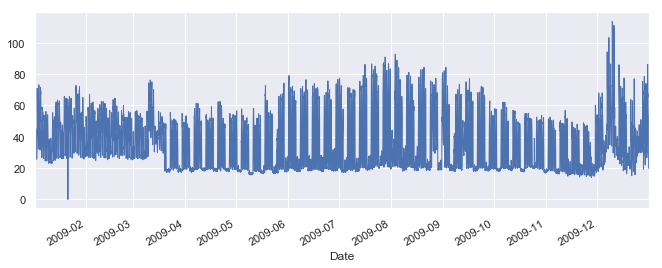

In [3]:
sns.set(rc={'figure.figsize':(11, 4)})

df['Building 6 kW'].plot(linewidth=1)

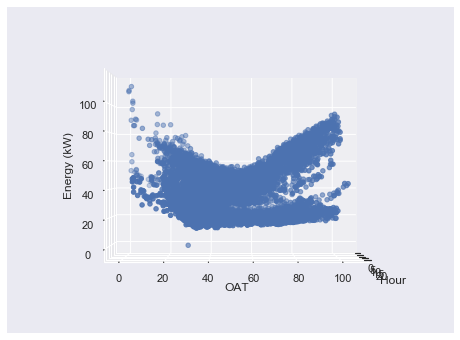

In [58]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection="3d")

# z_line = np.linspace(0, 15, 1000)
# x_line = np.cos(z_line)
# y_line = np.sin(z_line)
# ax.plot3D(x_line, y_line, z_line, 'gray')

xs = df['hour']
ys = df['OAT']
zs = df['Building 6 kW']
# ax.scatter3D(xs, ys, zs, c=ys, cmap='hsv');
ax.scatter3D(xs, ys, zs);
ax.view_init(0, 0)

# ax.plot_wireframe(xs, ys, zs, rstride=5, cstride=5)

ax.set_xlabel('Hour')
ax.set_ylabel('OAT')
ax.set_zlabel('Energy (kW)')

plt.show()

# rotate the axes and update
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

In [5]:
df.shape

(8735, 4)

In [10]:
from sklearn.linear_model import SGDRegressor
X = df.as_matrix(columns=['hour', 'OAT'])
y = df['Building 6 kW'].tolist

clf = SGDRegressor(loss="squared_loss", penalty=None)
clf.fit(X, y)

C:\Users\nickb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\nickb\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [18]:
X_pred = pd.DataFrame({'hour': [13], 'OAT': [35]})

y_pred = clf.predict(X_pred)

print(y_pred)

[2.87089102e+10]


In [41]:
def sgdRun(X, y, X_pred, max_iter=1000):
    clf = SGDRegressor(loss="squared_loss", penalty=None, max_iter=max_iter, tol=1e-3)
    clf.fit(X, y)
    
    y_pred = clf.predict(X_pred)
    
    print("Max Iter = " + str(max_iter))
    print(round(y_pred[0], 2))

In [42]:
for i in range(25):
    sgdRun(X, y, X_pred, (i+1)*1000)

Max Iter = 1000
71.84
Max Iter = 2000
45.8
Max Iter = 3000
71.14
Max Iter = 4000
36.61
Max Iter = 5000
-143.36
Max Iter = 6000
44.5
Max Iter = 7000
21.5
Max Iter = 8000
32.83
Max Iter = 9000
22.54
Max Iter = 10000
38.45
Max Iter = 11000
120.91
Max Iter = 12000
31.93
Max Iter = 13000
23.05
Max Iter = 14000
44.67
Max Iter = 15000
64.48
Max Iter = 16000
16.96
Max Iter = 17000
7.01
Max Iter = 18000
26.59
Max Iter = 19000
24.98
Max Iter = 20000
19.62
Max Iter = 21000
25.49
Max Iter = 22000
37.01
Max Iter = 23000
-7.39
Max Iter = 24000
17.02
Max Iter = 25000
18.15


In [24]:
range(1,10)

range(1, 10)

In [43]:
np.ceil(10**6 / len(y))

115.0

In [44]:
sgdRun(X, y, X_pred, np.ceil(10**6 / len(y)))

Max Iter = 115.0
42.1


In [56]:
X_predB = pd.DataFrame({'hour': [15], 'OAT': [30]})
sgdRun(X, y, X_predB, np.ceil(10**6 / len(y)))

Max Iter = 115.0
20.71


In [67]:
df_w = pd.read_csv('./data/austin_weather.csv')
df_w.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [81]:
df_w2 = df_w.set_index("Date")

df_w2 = df_w2['2016-01-01':'2016-12-31']
df_w2['Month'] = df_w2.index.to_series().apply(lambda x: pd.to_datetime(x).month)

df_w2.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,...,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,Month
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,48,46,44,36,33,28,66,60,53,30.53,...,30.38,-,-,-,15,8,24,T,Rain,1
2016-01-02,47,45,42,42,34,29,100,77,53,30.51,...,30.36,-,-,-,8,2,13,0.2,Rain,1
2016-01-03,62,52,41,43,39,32,96,70,43,30.36,...,30.22,10,10,10,9,3,14,T,Rain,1
2016-01-04,58,48,37,33,31,30,79,58,36,30.41,...,30.27,10,10,10,9,4,13,0,,1
2016-01-05,56,46,36,40,36,32,85,68,51,30.37,...,30.21,10,10,10,9,3,12,T,Rain,1


Text(0.5, 1.0, 'Average Temperature (Austin, TX)')

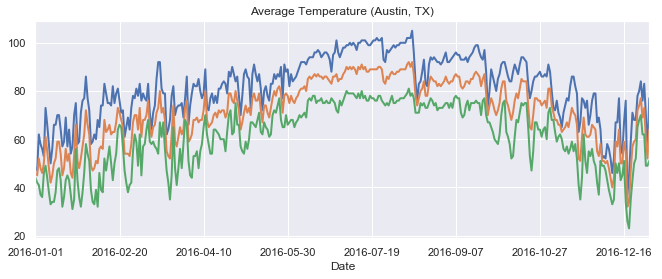

In [76]:
sns.set(rc={'figure.figsize': (11,4)})

df_w2['TempHighF'].plot(linewidth=2);
df_w2['TempAvgF'].plot(linewidth=2);
df_w2['TempLowF'].plot(linewidth=2);
plt.title("Average Temperature (Austin, TX)")
# plt.savefig("total_listings_time.png")

In [77]:
df_w2.index

Index(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
       '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09', '2016-01-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', name='Date', length=366)

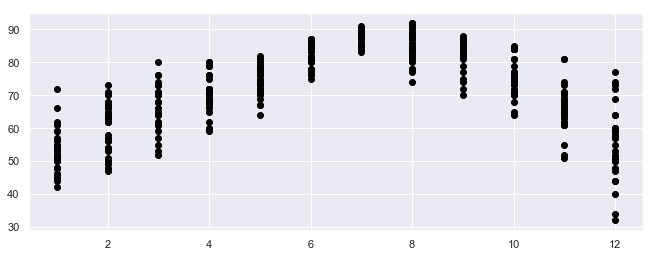

In [82]:
plt.plot(df_w2['Month'], df_w2['TempAvgF'], 'o', color='black');